In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Analysis tasks:**
- Visualize the proportion of babies given a particular name over time
- Determine the relative rank of a name
- Determine the most popular names in each year or the names whose popularity has advanced or declined the most
- Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
- Analyze external sources of trends: biblical names, celebrities, demographic changes

## **load data**

In [4]:
frames = []
for year in range(1880, 2011):
    frame = pd.read_csv(f'./data/yob{year}.txt', names=['name', 'sex', 'births'])
    frame['year'] = year
    frames.append(frame)
names = pd.concat(frames, ignore_index=True)
print(names.info())
names.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB
None


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## **total birth by sex and year**

In [5]:
total_birth = names.pivot_table('births',aggfunc='sum',columns='sex',index='year')
total_birth.tail(10)

sex,F,M
year,,
2001,1798284,1940498
2002,1794358,1938941
2003,1824406,1972439
2004,1833005,1981557
2005,1843890,1993285
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359


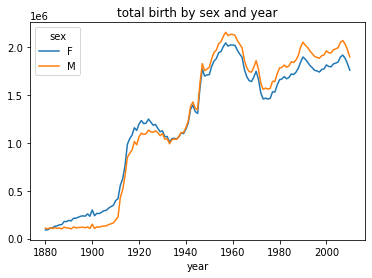

In [6]:
total_birth.plot(title='total birth by sex and year')

## **names percentage by year and sex**

In [7]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names.head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## **top 1,000 names for each sex/year combination**

In [8]:
def get_top(group,top):
    return group.sort_values(by='births', ascending=False).head(top)
top1000 = names.groupby(['year','sex']).apply(get_top,1000)
top1000.reset_index(inplace=True, drop=True)
top1000.head(10)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## **Naming Trends**

In [9]:
total_births = top1000.pivot_table('births', index='year',columns='name',aggfunc='sum')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f134020ddc0>,
      dtype=object)

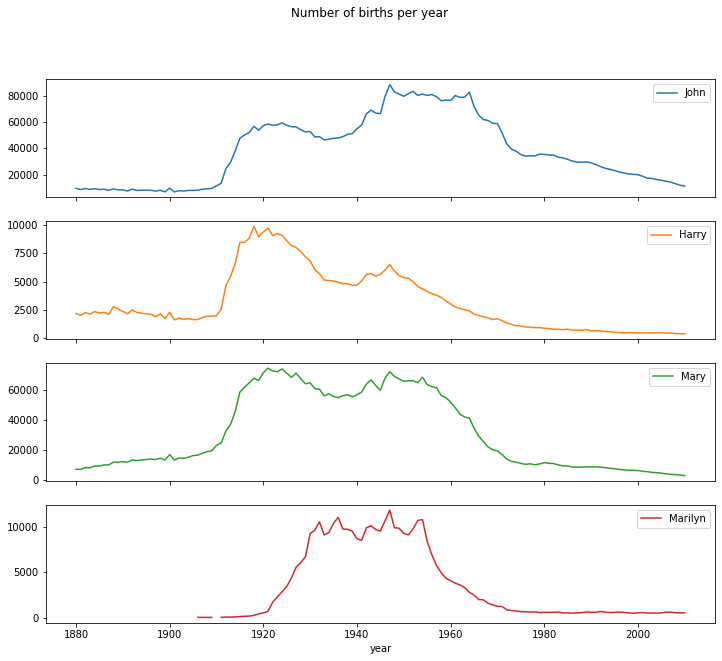

In [10]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

## **naming diversity. top 100 proportion trend. means fewer parents are choosing common names for their children**

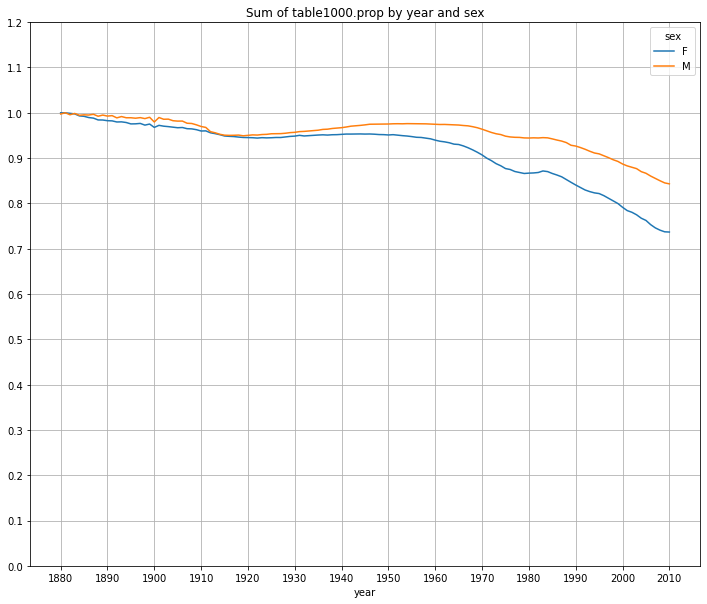

In [11]:
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',figsize=(12,10),grid=True,yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

## **number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births**

In [12]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
df = boys[boys.year == 2010]
df.head(10)

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


#### After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%. You could write a for loop to do this, but a vectorized NumPy way is a bit more clever. Taking the cumulative sum, cumsum, of prop and then calling the method searchsorted returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order

In [13]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
print(prop_cumsum.head(10))
print(prop_cumsum.values.searchsorted(0.5)+1) # Since arrays are zero-indexed, adding 1 to this result 

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64
117


In [14]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head(10)

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


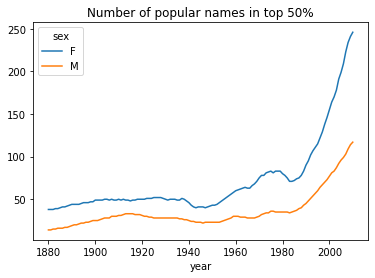

In [15]:
diversity.plot(title="Number of popular names in top 50%")

### conclusion: girl names have always been more diverse than boy names

## **boy names by final letter has changed significantly over the last 100 years**

In [16]:
last_letters = names.name.map(lambda x:x[-1])
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters,columns=['sex', 'year'], aggfunc='sum')
table.head(10)

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   

sex                                                                      \
year             2004      2005      2006      2007      2008      2009   
last_letter                                                               
a             38650.0   36838.0   36156.0   34654.0   32901.0   31430.0   
b             45914.0   43144.0   42600.0   42123.0   39945.0   38862.0   
c             26778.0   26078.0   26635.0   26864.0   25318.0   24048.0   
d             51754.0   50670.0   51410.0   50595.0   47910.0   46172.0   
e            142098.0  141123.0  142999.0  143698.0  140966.0  135496.0   
f              1904.0    1985.0    1968.0    2090.0    2195.0    2212.0   
g              1837.0    1882.0    1929.0    2040.0    2059.0    2396.0   
h             89620.0   92497.0   98477.0   99414.0  100250.0   99979.0   
i             28500.0   31317.0   33558.0   35231.0   38151.0   40912.0   
j              1094.0    1291.0    1241.0    1254.0    1381.0    1416.0   

sex                    
year             2010  
last_letter            
a             28438.0  
b             38859.0  
c             23125.0  
d             44398.0  
e            129012.0  
f              2255.0  
g              2666.0  
h             98090.0  
i             42956.0  
j              1459.0  

[10 rows x 262 columns]

In [17]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head(10)

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0

In [18]:
letter_prop = subtable / subtable.sum()
letter_prop.head(10)

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769

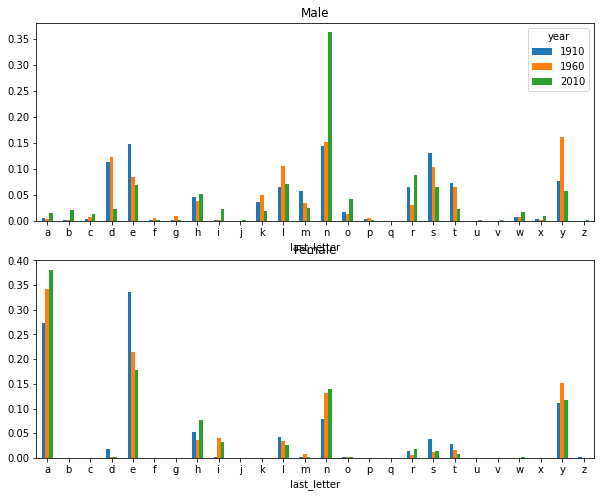

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

## Proportion of boys born with names ending in d/n/y over time

In [20]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head(10)

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405
1885,0.085472,0.146361,0.081882
1886,0.087647,0.149659,0.081681
1887,0.089072,0.148838,0.082870
1888,0.087707,0.151286,0.084919


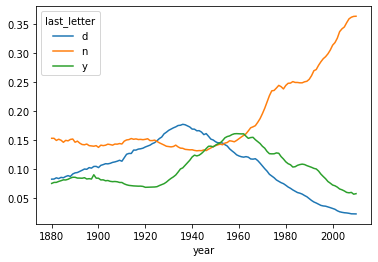

In [21]:
dny_ts.plot()

## **Boy names that became girl names (and vice versa)**

In [22]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [23]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [24]:
table = filtered.pivot_table('births', index='year',columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail(10)

sex,F,M
year,,
2001,1.0,NaN
2002,1.0,NaN
2003,1.0,NaN
2004,1.0,NaN
2005,1.0,NaN
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN


## **Proportion of male/female Lesley-like names over time**

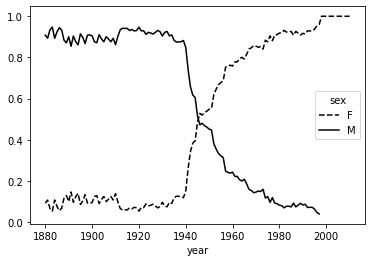

In [25]:
table.plot(style={'M': 'k-', 'F': 'k--'})